# Research Question:
#### Is there a correlation between degree obtained (the response variable) and both prestige level and percieved self status (the explanatory variables)?
<br>
Group 23 - DS 3001 - Foundations of ML <br>
Authored by: Tsega Kidanu, Elizabeth Peterson, Varun Pavuloori


This block below aggregates data from multiple sources. It downloads 37 CSV files from the GitHub repository and appends them into a single CSV file. Only the columns of interest (degree, class, and prestige) are retained. This approach is efficient for managing datasets that are distributed across multiple files by consolidating them into a single, cohesive dataset for analysis.

In [2]:
#Import Data
import pandas as pd
var_list = ['degree', 'class', 'prestige'] # List of variables to save
output_file = 'raw_gss_data2.csv' # Name of the file to save the data to

modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

for k in range(37): # r each chunk of the data
    url = 'https://github.com/DS3001/gss_zip/raw/main/gss_' + str(1+k) + '.csv' # Create url to the chunk to be processed
    # print(url) # Check the url is correct
    df = pd.read_csv(url,low_memory=False) # Download this chunk of data
    # print(df.head()) # Visually inspect the first few rows

    df.loc[:,var_list].to_csv(output_file, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved

    phase = 1 # Switch from write mode to append mode
    k =+ 1

df = pd.read_csv('raw_gss_data2.csv')
df.describe()


,degree,class,prestige
count,72230,68894,24303
unique,6,6,63
top,high school,middle class,50.0
freq,36446,31014,1913


Initial exploration of the degree column is conducted. This block identifies unique educational levels present in the data, counts how often each occurs, and checks for any missing values. Such preliminary analysis is crucial for understanding the distribution and completeness of a key variable.



In [3]:
# Cleaning Data
# Check list of the unique values occuring for "educ" variable (degree)

unique_degree= df['degree'].unique() #Isolating unique degree values and printing them
print(unique_degree)
print(df['degree'].value_counts())

missing_values = df['degree'].isnull().sum() #check missing values
print("Number of missing values ", missing_values) # 196

df['degree'].describe() #stat summary

["bachelor's" 'less than high school' 'high school' 'graduate'
 'associate/junior college' nan 'degree']
high school                 36446
less than high school       14192
bachelor's                  11248
graduate                     5953
associate/junior college     4355
degree                         36
Name: degree, dtype: int64
Number of missing values  196


count           72230
unique              6
top       high school
freq            36446
Name: degree, dtype: object

Focused on cleaning the degree column, this block creates a new column, degree_no_na, and removes any rows with missing degree values. This ensures that the analysis isn't skewed by incomplete data.

In [4]:
import numpy as np

df['degree_no_na'] = df['degree'] #Copying the degree column in order to clean it
df= df[-df['degree_no_na'].isna()] #Removing rows with missing values

print(df['degree_no_na'].value_counts()) #frequency of each unique val
df['degree_no_na'].describe() #stat summary

unique_degree= df['degree_no_na'].unique() #Isolating unique degree values and printing them
print(unique_degree)
print(df['degree_no_na'].value_counts())


high school                 36446
less than high school       14192
bachelor's                  11248
graduate                     5953
associate/junior college     4355
degree                         36
Name: degree_no_na, dtype: int64
["bachelor's" 'less than high school' 'high school' 'graduate'
 'associate/junior college' 'degree']
high school                 36446
less than high school       14192
bachelor's                  11248
graduate                     5953
associate/junior college     4355
degree                         36
Name: degree_no_na, dtype: int64


Similar to Block 2, this block explores the prestige column. It identifies unique values, counts their occurrences, and checks for missing entries. This helps in understanding the range and distribution of prestige levels in the dataset.



In [5]:
# Check unique values and count of 'prestige' variable
unique_prestige = df['prestige'].unique()
print(unique_prestige)
print(df['prestige'].value_counts())

# Check the number of missing values in 'prestige'
missing_values_prestige = df['prestige'].isnull().sum()
print("Number of missing values in prestige: ", missing_values_prestige)

['50.0' '45.0' '44.0' '57.0' '40.0' '49.0' '41.0' '36.0' '26.0' '18.0'
 '12.0' '32.0' '63.0' nan '51.0' '46.0' '60.0' '19.0' '34.0' '22.0' '29.0'
 '62.0' '47.0' '48.0' '17.0' '33.0' '38.0' '27.0' '14.0' '25.0' '20.0'
 '78.0' '35.0' '67.0' '56.0' '69.0' '16.0' '39.0' '23.0' '43.0' '31.0'
 '42.0' '61.0' '72.0' '37.0' '74.0' '54.0' '30.0' '28.0' '52.0' '15.0'
 '68.0' '24.0' '55.0' '76.0' '58.0' '71.0' '82.0' 'prestige' '21.0' '53.0'
 '65.0' '66.0' '70.0']
50.0    1906
36.0    1867
46.0    1241
32.0    1163
34.0     977
        ... 
66.0      14
53.0      13
70.0      11
21.0       7
65.0       1
Name: prestige, Length: 63, dtype: int64
Number of missing values in prestige:  48011


This block cleans the prestige column by handling missing or undefined values. A new column, prestige_no_na, is created to maintain data integrity. The original prestige values are retained, but the new column ensures a clean, uninterrupted dataset for further analysis.

In [6]:
# Replace missing values with 'Unknown'
df['prestige_no_na'] = df['prestige'].replace('prestige', np.nan) # get rid of prestige variable (same as with educ but differnet way)
df= df[-df['prestige_no_na'].isna()]

# Convert 'prestige_no_na' to a numeric data type (For later data visualization)
df['prestige_no_na'] = pd.to_numeric(df['prestige_no_na'], errors='coerce')

# Check unique values and count of 'prestige' after replacement
unique_prestige = df['prestige_no_na'].unique()
print(unique_prestige)
print(df['prestige_no_na'].value_counts())

[50. 45. 44. 57. 40. 49. 41. 36. 26. 18. 12. 32. 63. 51. 46. 60. 19. 34.
 22. 29. 62. 47. 48. 17. 33. 38. 27. 14. 25. 20. 78. 35. 67. 56. 69. 16.
 39. 23. 43. 31. 42. 61. 72. 37. 74. 54. 30. 28. 52. 15. 68. 24. 55. 76.
 58. 71. 82. 21. 53. 65. 66. 70.]
50.0    1906
36.0    1867
46.0    1241
32.0    1163
34.0     977
        ... 
66.0      14
53.0      13
70.0      11
21.0       7
65.0       1
Name: prestige_no_na, Length: 62, dtype: int64


<ipython-input-6-5647a01c10df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prestige_no_na'] = df['prestige'].replace('prestige', np.nan) # get rid of prestige variable (same as with educ but differnet way)


A descriptive analysis of the cleaned prestige column is conducted. By summarizing the data, one can gain insights into the distribution and central tendencies of prestige scores, aiding in hypothesis formulation or further data processing.

In [7]:
print(df['prestige_no_na'].describe())

count    24183.000000
mean        39.363189
std         14.041282
min         12.000000
25%         30.000000
50%         39.000000
75%         48.000000
max         82.000000
Name: prestige_no_na, dtype: float64


This block provides an initial exploration of the class column, which represents perceived self-status. By identifying unique values, counting occurrences, and checking for missing values, the distribution and completeness of this variable are assessed, similar to Blocks 2 and 4.

In [8]:
# Check unique values and count of 'class' variable
unique_class = df['class'].unique()
print(unique_class)
print(df['class'].value_counts())

# Check the number of missing values in 'class'
missing_values_class = df['class'].isnull().sum() # 1513
print("Number of missing values in class: ", missing_values_class)

['middle class' 'working class' 'upper class' 'lower class' nan 'no class']
working class    10733
middle class     10230
lower class       1027
upper class        679
no class             1
Name: class, dtype: int64
Number of missing values in class:  1513


The focus here is on cleaning the class column. A new column, class_no_na, is introduced, and rows with missing class values are removed. The approach mirrors the cleaning process in Blocks 3 and 5, highlighting the importance of consistent data cleaning across all variables of interest.

In [9]:
# Check unique values and count of 'class' after replacement
df['class_no_na'] = df['class']
df = df[-df['class_no_na'].isna()]

# Remove rows with 'no class' in 'class_no_na'
df = df[df['class_no_na'] != 'no class']

unique_class = df['class_no_na'].unique()
print(unique_class)
print(df['class_no_na'].value_counts())
df['class_no_na'].describe()

['middle class' 'working class' 'upper class' 'lower class']
working class    10733
middle class     10230
lower class       1027
upper class        679
Name: class_no_na, dtype: int64


count             22669
unique                4
top       working class
freq              10733
Name: class_no_na, dtype: object

Final Check before Data Visualization. Ensure that the data has been pre-processed properly.

In [10]:
# 1. Check Data Types and Missing Values
data_info = pd.DataFrame()

# Data types of the columns of interest
data_info['Data Type'] = df[['degree_no_na', 'class_no_na', 'prestige_no_na']].dtypes

# Count of missing values in the columns of interest
data_info['Missing Values'] = df[['degree_no_na', 'class_no_na', 'prestige_no_na']].isnull().sum()

print(data_info)

# 2. Examine Unique Values
print("\nUnique values in 'degree_no_na':\n", df['degree_no_na'].value_counts())
print("\nUnique values in 'class_no_na':\n", df['class_no_na'].value_counts())

# 3. Summary Statistics
print("\nSummary statistics for 'prestige_no_na':\n", df['prestige_no_na'].describe())


               Data Type  Missing Values
degree_no_na      object               0
class_no_na       object               0
prestige_no_na   float64               0

Unique values in 'degree_no_na':
 high school                 11734
less than high school        6350
bachelor's                   2603
graduate                     1195
associate/junior college      787
Name: degree_no_na, dtype: int64

Unique values in 'class_no_na':
 working class    10733
middle class     10230
lower class       1027
upper class        679
Name: class_no_na, dtype: int64

Summary statistics for 'prestige_no_na':
 count    22669.000000
mean        39.363757
std         14.042784
min         12.000000
25%         30.000000
50%         39.000000
75%         48.000000
max         82.000000
Name: prestige_no_na, dtype: float64


###Refining the Dataset
Initiating with the aggregation of fragmented data, 37 CSV files were seamlessly combined into a comprehensive dataset, retaining only pivotal columns: degree, class, and prestige. Recognizing the voluntary nature of the General Social Survey, we anticipated and addressed the presence of missing values. In the first wave of refining, columns were methodically renamed for clarity, and rows with incomplete data in our focal columns were excised. The subsequent wave scrutinized the cleaned subset for data consistency. This involved standardizing textual entries, ensuring uniform representation, and examining for potential anomalies in numeric values like the prestige scores. While the dataset's reputable origin vouches for its quality, meticulous checks ensured its readiness for subsequent analyses.



#Data Visualization
Our primary visualizations for our dataset that will help in answering our research question are:


*   Distribution Visualizations for the columns degree, class, and prestige.
*   Box Plots to visualize the relationship between degree (the response variable) and prestige as well as class (the explanatory variables).



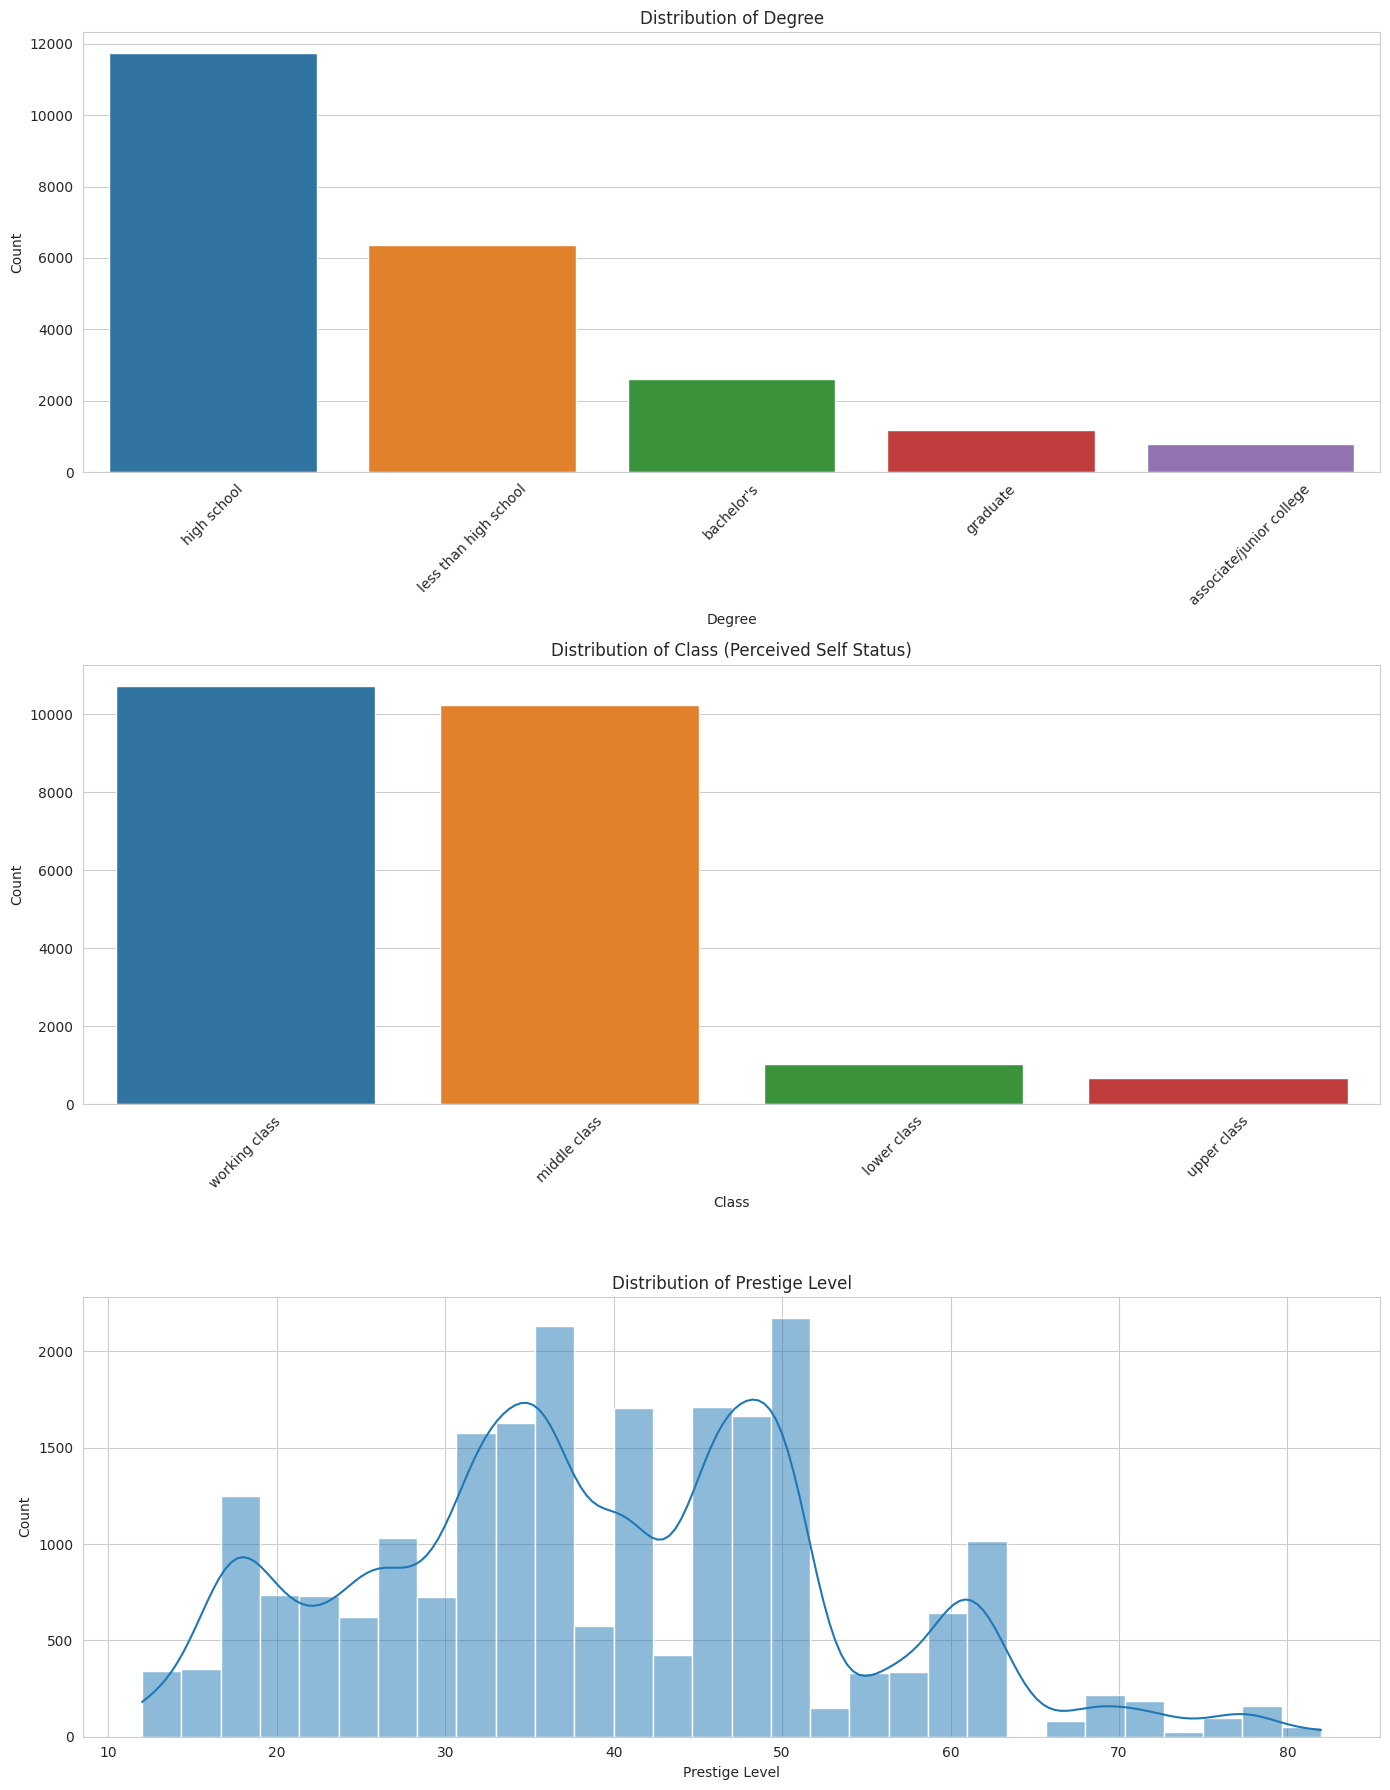

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting style
sns.set_style("whitegrid")

# Creating subplots for each variable
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Plotting the distribution for each column
sns.countplot(data=df, x='degree_no_na', ax=axes[0], order=df['degree_no_na'].value_counts().index)
axes[0].set_title('Distribution of Degree')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='class_no_na', ax=axes[1], order=df['class_no_na'].value_counts().index)
axes[1].set_title('Distribution of Class (Perceived Self Status)')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

sns.histplot(data=df, x='prestige_no_na', ax=axes[2], bins=30, kde=True)
axes[2].set_title('Distribution of Prestige Level')
axes[2].set_xlabel('Prestige Level')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

The visual distributions above provide a comprehensive view of the dataset's composition. The degree plot reveals the educational makeup of the respondents, potentially showing predominant categories like "high school" or "bachelor's". In the class distribution, we gauge respondents' perceptions of their social status, with categories such as "working class" or "middle class" likely representing the majority. The prestige histogram, complemented by the Kernel Density Estimation (KDE), showcases the range and commonality of prestige scores, offering insights into the typical prestige levels of the survey participants.



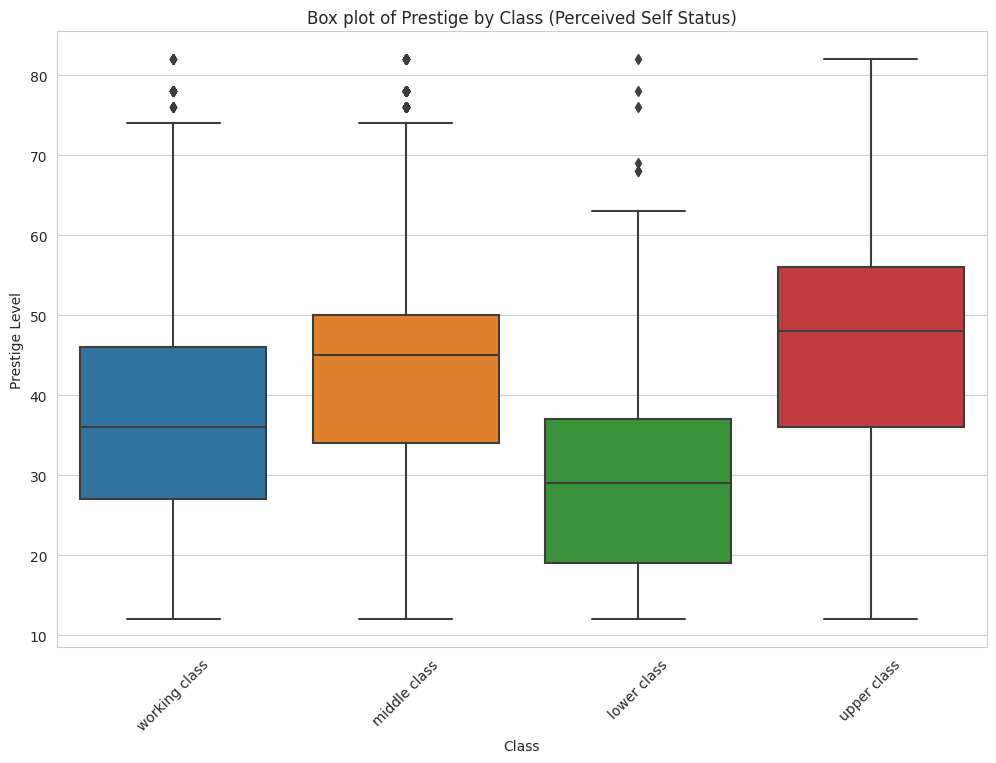

In [12]:
# Box plot for Class vs Prestige
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='class_no_na', y='prestige_no_na', order=df['class_no_na'].value_counts().index)
plt.title('Box plot of Prestige by Class (Perceived Self Status)')
plt.xlabel('Class')
plt.ylabel('Prestige Level')
plt.xticks(rotation=45)
plt.show()

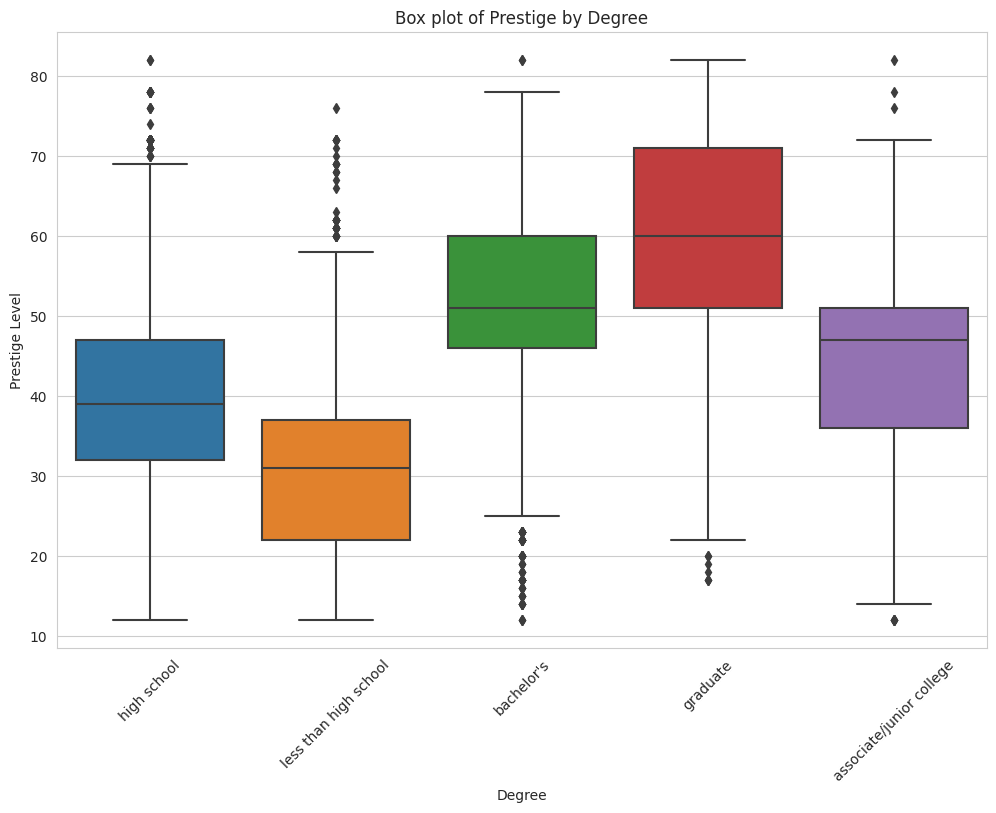

In [13]:
# Box plot for Degree vs Prestige
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='degree_no_na', y='prestige_no_na', order=df['degree_no_na'].value_counts().index)
plt.title('Box plot of Prestige by Degree')
plt.xlabel('Degree')
plt.ylabel('Prestige Level')
plt.xticks(rotation=45)
plt.show()

###Box Plots of Prestige by Degree and Class:
These visualizations juxtapose prestige scores with both educational levels and perceived self status. The median prestige score for each category is highlighted by the central line in each box, while the spread signifies the variability within the group. Notably, patterns may emerge, suggesting correlations between higher educational achievements or specific social classes with elevated prestige scores. Outliers, if present, can also indicate exceptional cases beyond typical patterns. Collectively, these box plots provide a multifaceted view of how education and self-perceived status relate to prestige.



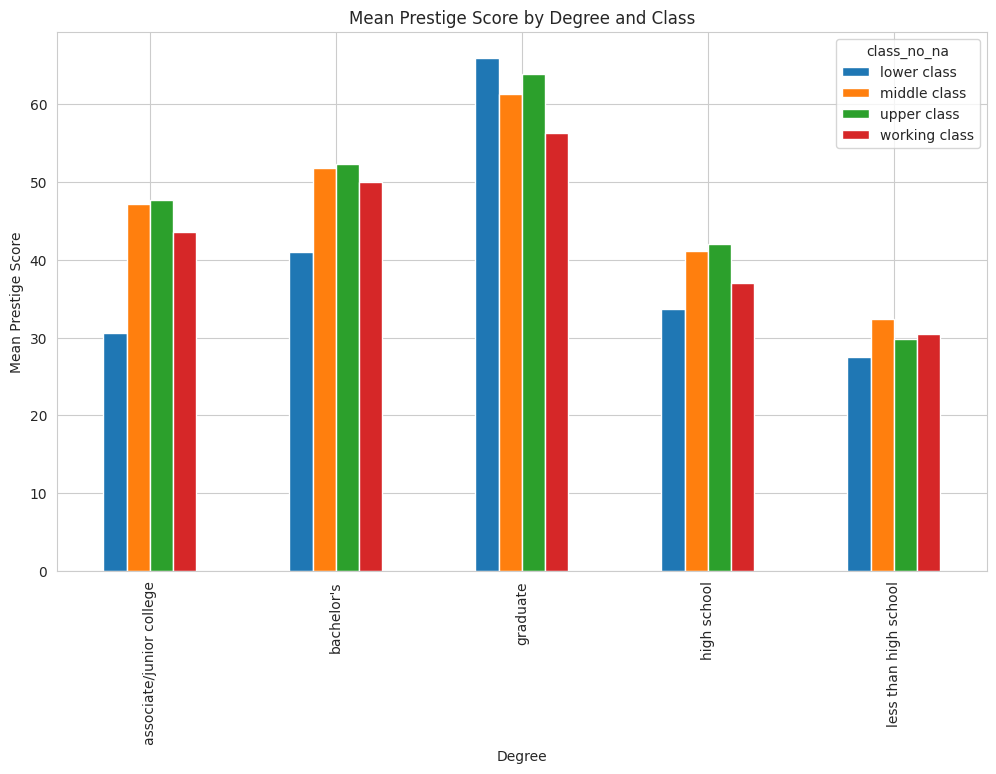

In [16]:
grouped = df.groupby(['degree_no_na', 'class_no_na'])['prestige_no_na'].mean().unstack()
grouped.plot(kind='bar', figsize=(12, 7))
plt.title("Mean Prestige Score by Degree and Class")
plt.ylabel("Mean Prestige Score")
plt.xlabel("Degree")
plt.show()

####Grouped Bar Chart
The chart depicts the relationship between educational level and perceived social status with respect to prestige scores. As education levels increase, the prestige scores tend to rise. Within each education bracket, those identifying with a higher social class generally show a higher prestige score. This suggests both education and self-perceived class play significant roles in determining one's prestige.